# 1. _Inspect the dataloader_

(Is the dataloader working correctly?)

ask...

a) Do test and train loaders have the length we expect? \
b) What happens when we change $\alpha$? \
c) What happens to our training data when we fix parameter seed? \
d) What happens to the data augmentations when we fix parameter seed? \
e) Do the labels match the images? \
f) What does the data look like without transformations? \
g) What does the data look like with transformations? \

In [2]:
from subgroups.dataloading_ffcv import make_dataloaders
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

def load_data(loader):
    all_labs = []
    all_ims = []
    for i, (ims, labs) in tqdm(enumerate(loader), total=len(loader)):
        all_labs.append(labs.cpu().numpy())
        all_ims.append(ims.cpu().numpy())
    return all_ims, all_labs



def check_image_labels(batch_size, all_labs_train, all_ims_train):
    num_images = 9  
    fig, axes = plt.subplots(5, 10, figsize=(9.1, 4.9))
    batch_id = np.random.choice(len(all_labs_train))
    ims = np.random.choice(batch_size, 50, replace=False) 
    print('batch_id', batch_id)
    for i, ax in enumerate(axes.flat):
        i = ims[i]
        img = all_ims_train[batch_id][i].transpose(1, 2, 0)
        label = all_labs_train[batch_id][i]
        ax.set_title(f'Label: {label}', fontsize=10)
        ax.imshow(img.astype(int))
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [4]:
# get data
train_dataset = './CIFAR10/cifar10_train_subset_binaryLabels.beton'
test_dataset = './CIFAR10/cifar10_val_subset_binaryLabels.beton'
batch_size = 50
num_workers = 1
seed = 42
alpha = 1
length = 25000
get_val_samples = False
no_transform = True
test_batch_size=2000
loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, test_batch_size, get_val_samples, no_transform)

all_ims_train, all_labs_train = load_data(loaders[0]['train'])
all_ims_test, all_labs_test = load_data(loaders[0]['test'])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.05it/s]


In [5]:
print(np.unique(np.concatenate(all_labs_train)))
print(np.unique(np.concatenate(all_labs_test)))


[0 1]
[0 1]


In [6]:
# Check lengths (alpha = 1 here)
assert len(np.concatenate(all_labs_train)) == length
assert len(np.concatenate(all_labs_test)) == 10000

Train Set Images
batch_id 73


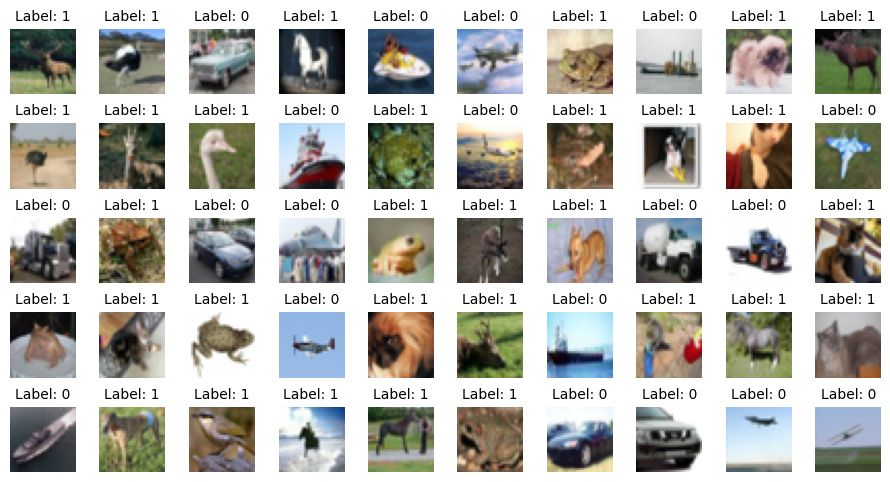

Test Set Images
batch_id 1


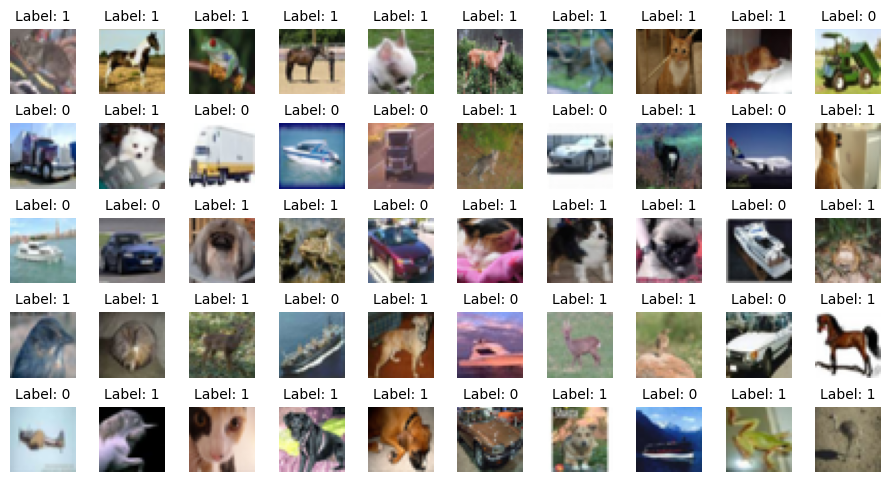

In [7]:
# Check labels & Images without transformations
print('Train Set Images')
check_image_labels(batch_size, all_labs_train, all_ims_train)

print('Test Set Images')
check_image_labels(batch_size, all_labs_test, all_ims_test)

In [11]:
# check batch order for train (Should be RANDOM)
for i, (ims, labs) in tqdm(enumerate(loaders[0]['train']), total=10):
    print(labs.sum())
    if i ==10:
        break

# check batch order for test (Shoudld be SEQUENTIAL)
for i, (ims, labs) in tqdm(enumerate(loaders[0]['test']), total=10):
    print(labs.sum())
    if i ==10:
        break

 10%|██████████████                                                                                                                               | 1/10 [00:00<00:06,  1.47it/s]

tensor(35, device='cuda:0')


 20%|████████████████████████████▏                                                                                                                | 2/10 [00:01<00:05,  1.51it/s]

tensor(35, device='cuda:0')


 30%|██████████████████████████████████████████▎                                                                                                  | 3/10 [00:01<00:04,  1.60it/s]

tensor(31, device='cuda:0')


 40%|████████████████████████████████████████████████████████▍                                                                                    | 4/10 [00:02<00:03,  1.83it/s]

tensor(29, device='cuda:0')


 50%|██████████████████████████████████████████████████████████████████████▌                                                                      | 5/10 [00:03<00:03,  1.57it/s]

tensor(25, device='cuda:0')


 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                        | 6/10 [00:03<00:02,  1.77it/s]

tensor(30, device='cuda:0')


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 7/10 [00:03<00:01,  1.96it/s]

tensor(29, device='cuda:0')


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 8/10 [00:04<00:00,  2.33it/s]

tensor(28, device='cuda:0')


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 9/10 [00:04<00:00,  2.41it/s]

tensor(32, device='cuda:0')


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.78it/s]

tensor(31, device='cuda:0')


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.92it/s]


tensor(29, device='cuda:0')


 50%|██████████████████████████████████████████████████████████████████████                                                                      | 5/10 [00:00<00:00, 652.53it/s]

tensor(1186, device='cuda:0')
tensor(1210, device='cuda:0')
tensor(1239, device='cuda:0')
tensor(1195, device='cuda:0')
tensor(1170, device='cuda:0')


In [18]:
# what does the data look like with data augmentation?
loaders_augmented = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, test_batch_size, get_val_samples, no_transform=False)
loaders_fixed_train_order = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, test_batch_size, get_val_samples, no_transform=True, return_sequential=True)
loaders_augmented_fixed_train_order = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, test_batch_size, get_val_samples, no_transform=False, return_sequential=True)

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

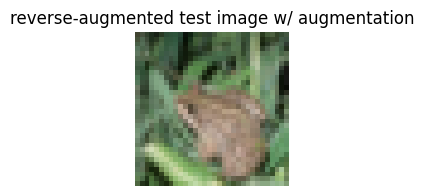

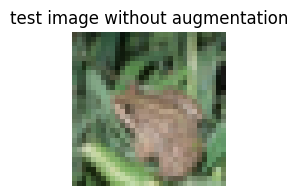

In [20]:
# was the test data properly augmented? 
sele = np.random.choice(batch_size)
for ims, labs in loaders_augmented[0]['test']:
    image_tensor = ims[sele].cpu()
    break

CIFAR_MEAN = [125.307, 122.961, 113.8575]
CIFAR_STD = [51.5865, 50.847, 51.255]
reverse_normalize = transforms.Normalize(
    mean=[-m/s for m, s in zip(CIFAR_MEAN, CIFAR_STD)],
    std=[1/s for s in CIFAR_STD]
)
original_image = reverse_normalize(image_tensor)
plt.figure(figsize=(2,2))
plt.imshow(original_image.numpy().transpose(1,2,0).astype(int))
plt.title('reverse-augmented test image w/ augmentation')
plt.axis('off')

for ims, labs in loaders[0]['test']:
    image_tensor = ims[sele].cpu()
    break

plt.figure(figsize=(2,2))
plt.imshow(image_tensor.numpy().transpose(1,2,0).astype(int))
plt.title('test image without augmentation')
plt.axis('off')

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

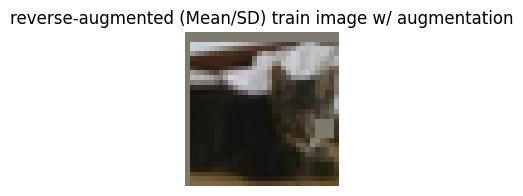

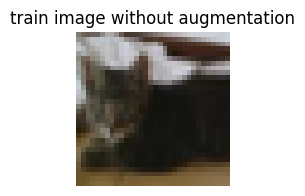

In [21]:
# was the train data properly augmented? 
sele = np.random.choice(batch_size)
for ims, labs in loaders_augmented_fixed_train_order[0]['train']:
    image_tensor = ims[sele].cpu()
    break

CIFAR_MEAN = [125.307, 122.961, 113.8575]
CIFAR_STD = [51.5865, 50.847, 51.255]
reverse_normalize = transforms.Normalize(
    mean=[-m/s for m, s in zip(CIFAR_MEAN, CIFAR_STD)],
    std=[1/s for s in CIFAR_STD]
)
original_image = reverse_normalize(image_tensor)
plt.figure(figsize=(2,2))
plt.imshow(original_image.numpy().transpose(1,2,0).astype(int))
plt.title('reverse-augmented (Mean/SD) train image w/ augmentation')
plt.axis('off')

for ims, labs in loaders_fixed_train_order[0]['train']:
    image_tensor = ims[sele].cpu()
    break

plt.figure(figsize=(2,2))
plt.imshow(image_tensor.numpy().transpose(1,2,0).astype(int))
plt.title('train image without augmentation')
plt.axis('off')

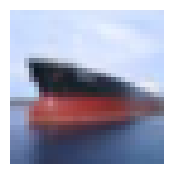

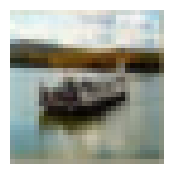

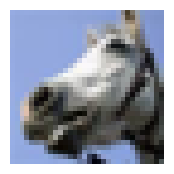

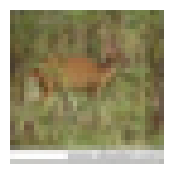

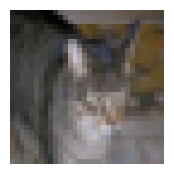

In [22]:
# Since we will be performing many instances of creating dataloaders with different train split seeds, we have to understand what happens when we change a seed
# (first without changing alpha)
# we don't necessarily want the ordering to be tied to the choice of alpha (although this shouldn't be a huge issue)
sele = 0
seed = 5
for i in range(5):
    loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, get_val_samples, no_transform=True, return_sequential=False)

    for ims, labs in loaders[0]['train']:
        image_tensor = ims[sele].cpu()
        break

    plt.figure(figsize=(2,2))
    plt.imshow(image_tensor.numpy().transpose(1,2,0).astype(int))
    plt.axis('off')

# for the train set (although not for the test) different calls to make_dataloaders with the same seed for training subsets should not affect batch randomness

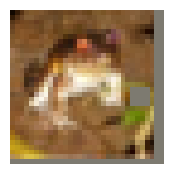

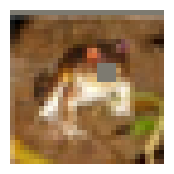

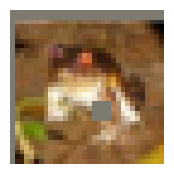

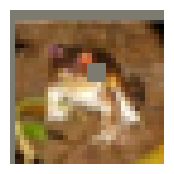

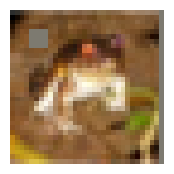

In [23]:
# data augmentation should not be tied to the train split seed
seed = 5
for i in range(5):
    loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, i, alpha, length, get_val_samples, no_transform=False, return_sequential=True)

    for ims, labs in loaders[0]['train']:
        image_tensor = ims[sele].cpu()
        break

    plt.figure(figsize=(2,2))
    original_image = reverse_normalize(image_tensor)
    plt.imshow(original_image.numpy().transpose(1,2,0).astype(int))
    plt.axis('off')

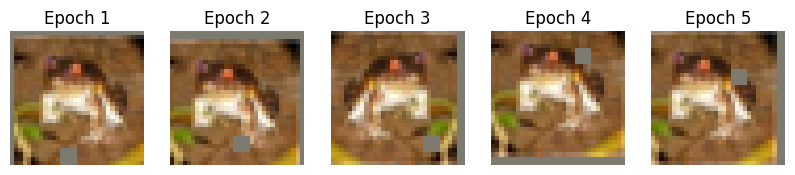

In [24]:
# Check if data augmentation is different at each epoch of the train data

# Set the seed and alpha value
seed = 5
alpha = 0.2

# Create dataloaders with data augmentation enabled
loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, get_val_samples, no_transform=False, return_sequential=True)

# Select an image index to inspect
sele = 0

# Store images from different epochs
augmented_images = []

# Iterate through multiple epochs
for epoch in range(5):
    for ims, labs in loaders[0]['train']:
        image_tensor = ims[sele].cpu()
        break
    augmented_images.append(reverse_normalize(image_tensor).numpy().transpose(1,2,0).astype(int))

# Plot the images from different epochs to visually inspect data augmentation
plt.figure(figsize=(10, 2))
for i, img in enumerate(augmented_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'Epoch {i+1}')
    plt.axis('off')
plt.show()


In [27]:
# Check the order of train samples in each epoch

# Set the seed and alpha value
seed = 5
alpha = 0.2

# Create dataloaders with data augmentation enabled
loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, get_val_samples, no_transform=False, return_sequential=False)

# Store indices from different epochs
epoch_indices = []

# Iterate through multiple epochs
for epoch in range(5):
    epoch_indices.append([])
    for ims, labs in loaders[0]['train']:
        epoch_indices[epoch].extend(labs.cpu().numpy())

# Check if the order of train samples is different at each epoch
for epoch in range(5):
    print(f"Epoch {epoch+1} sample order: {epoch_indices[epoch][:10]}")  # Print first 10 indices for brevity


Epoch 1 sample order: [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1)]
Epoch 2 sample order: [np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0)]
Epoch 3 sample order: [np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1)]
Epoch 4 sample order: [np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1)]
Epoch 5 sample order: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1)]


In [32]:
# finally, what happens when we change alpha?

for i in ([0.1, 0.2, 0.3, 0.4]):
    loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, i, length, test_batch_size, get_val_samples, no_transform=False, return_sequential=True)
    print('Train sampled length:', len(loaders[0]['train'])*batch_size, 'Train expected length:', int(i*length))
    print('Test sampled length:', len(loaders[0]['test'])*test_batch_size, 'test expected length:', int(10000))


Train sampled length: 2500 Train expected length: 2500
Test sampled length: 10000 test expected length: 10000
Train sampled length: 5000 Train expected length: 5000
Test sampled length: 10000 test expected length: 10000
Train sampled length: 7450 Train expected length: 7500
Test sampled length: 10000 test expected length: 10000
Train sampled length: 9950 Train expected length: 10000
Test sampled length: 10000 test expected length: 10000


In [33]:
# Check that the indices reported by the dataloader are correct
alpha = 0.2
loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, get_val_samples, no_transform=False, return_sequential=True)
all_ims_train, all_labs_trainb = load_data(loaders[0]['train'])
L = loaders[0]['train']
np.array_equal(L.indices, loaders[1])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.21it/s]


True

In [34]:
# check that the indices differ each time we use a new seed
out = []
for seed in range(10):
    loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, get_val_samples, no_transform=False, return_sequential=True)
    L = loaders[0]['train']
    out.append(L.indices)

[print(len(x)) for x in out]
out


4992
4955
5052
5059
4981
5012
4993
5132
4996
4982


[array([    4,     5,     9, ..., 24985, 24993, 24994]),
 array([    1,     3,     6, ..., 24988, 24990, 24995]),
 array([    2,    16,    22, ..., 24981, 24998, 24999]),
 array([    2,    15,    21, ..., 24984, 24987, 24993]),
 array([    0,     2,     6, ..., 24997, 24998, 24999]),
 array([    0,     1,     9, ..., 24972, 24979, 24986]),
 array([    4,    11,    13, ..., 24987, 24988, 24995]),
 array([    1,     5,     7, ..., 24993, 24995, 24999]),
 array([    1,     4,    14, ..., 24980, 24981, 24995]),
 array([    0,     5,     6, ..., 24987, 24989, 24998])]

In [35]:
# check that the indices differ each time we use a new seed
out = []
for seed in range(10):
    loaders = make_dataloaders(train_dataset, test_dataset, batch_size, num_workers, seed, alpha, length, get_val_samples, no_transform=False, return_sequential=False)
    L = loaders[0]['train']
    out.append(L.indices)

[print(len(x)) for x in out]
out


4992
4955
5052
5059
4981
5012
4993
5132
4996
4982


[array([    4,     5,     9, ..., 24985, 24993, 24994]),
 array([    1,     3,     6, ..., 24988, 24990, 24995]),
 array([    2,    16,    22, ..., 24981, 24998, 24999]),
 array([    2,    15,    21, ..., 24984, 24987, 24993]),
 array([    0,     2,     6, ..., 24997, 24998, 24999]),
 array([    0,     1,     9, ..., 24972, 24979, 24986]),
 array([    4,    11,    13, ..., 24987, 24988, 24995]),
 array([    1,     5,     7, ..., 24993, 24995, 24999]),
 array([    1,     4,    14, ..., 24980, 24981, 24995]),
 array([    0,     5,     6, ..., 24987, 24989, 24998])]